In [20]:
import librosa  # müzik ve ses analizi için
import librosa.display
import scipy as sp # karmaşık matematiksel veya bilimsel problemleri hesaplamak için
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# load audio file in the player
audio_path = "audio/piano_c.wav"
ipd.Audio(audio_path)

In [22]:
# load audio file
signal, sr = librosa.load(audio_path)

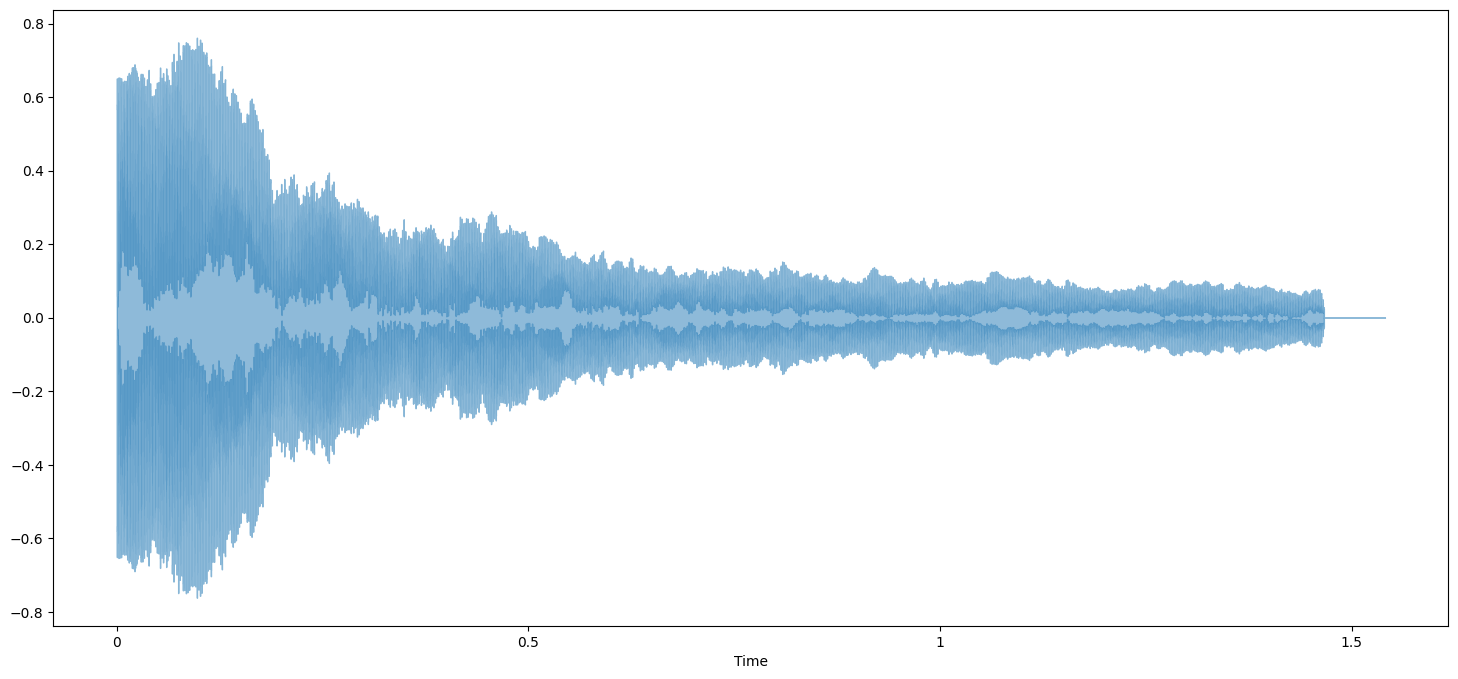

In [23]:
# plot waveform
plt.figure(figsize = (18, 8))
librosa.display.waveshow(signal, sr = sr, alpha = 0.5)
plt.show()

- [scipy fast fourier transform documentation](https://docs.scipy.org/doc/scipy/tutorial/fft.html)

- [numpy.absolute documentation](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)

- [numpy.linspace documentation](https://numpy.org/doc/1.18/reference/generated/numpy.linspace.html?highlight=nump%20linspace#numpy.linspace)

In [24]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)  # array'deki elemanların mutlak değerlerini almak için
frequency = np.linspace(0, sr, len(magnitude)) # np.linspace() metodu başlangıçtan sona num tane sayıyı birbiri arası uzaklık eşit olacak şekilde böler.

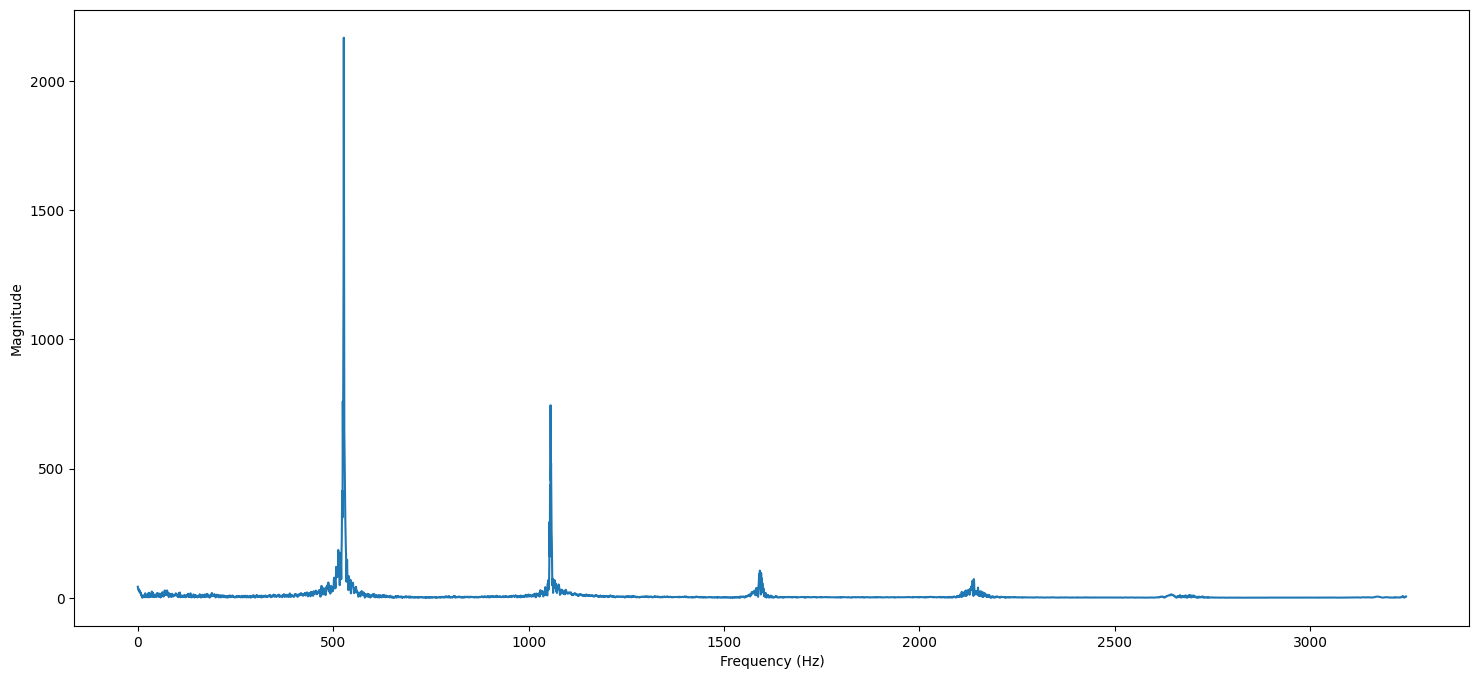

In [25]:
# plot spectrum
plt.figure(figsize = (18, 8))
plt.plot(frequency[: 5000], magnitude[: 5000])  # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [26]:
len(signal)

33968

In [27]:
# duration
d = 1 / sr
d

4.5351473922902495e-05

In [28]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [29]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

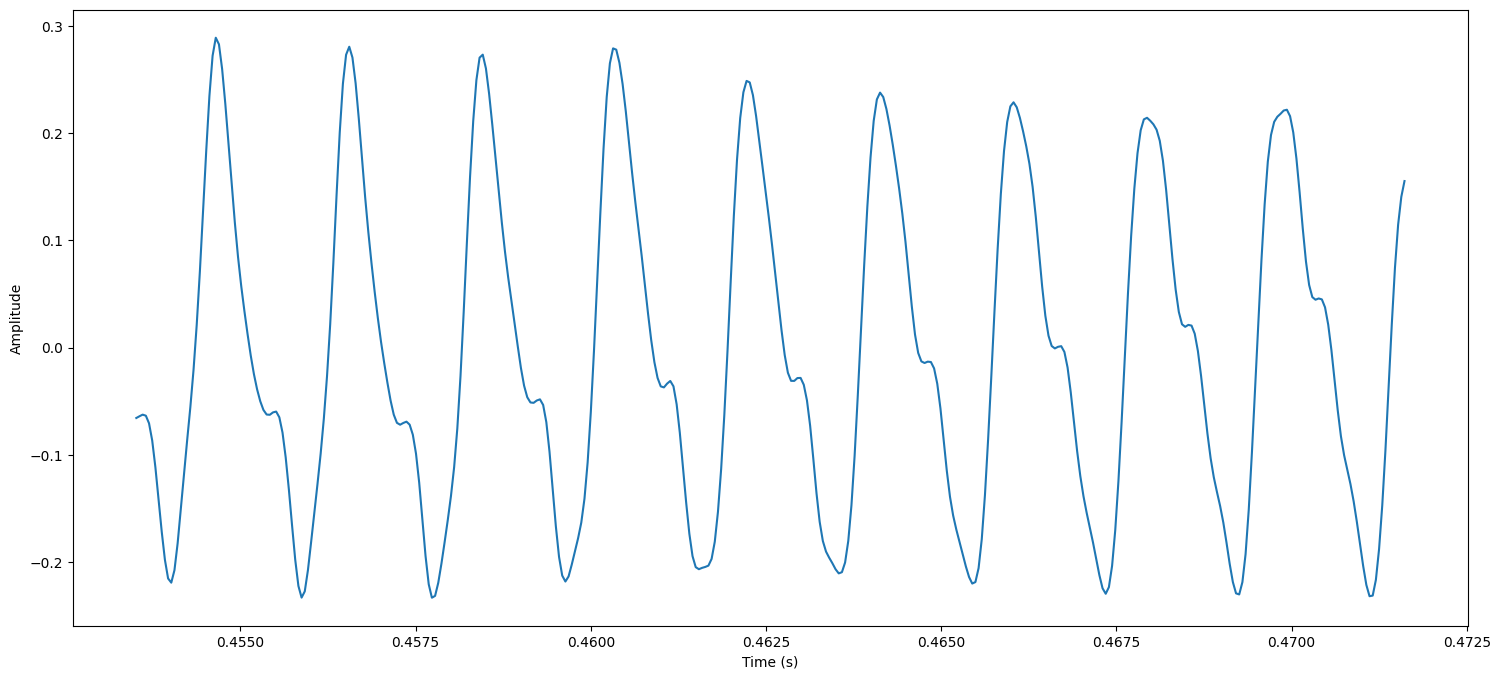

In [30]:
# zoom into the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr = sr)

plt.figure(figsize = (18, 8))
plt.plot(t[10000: 10400], signal[10000: 10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Sine Wave

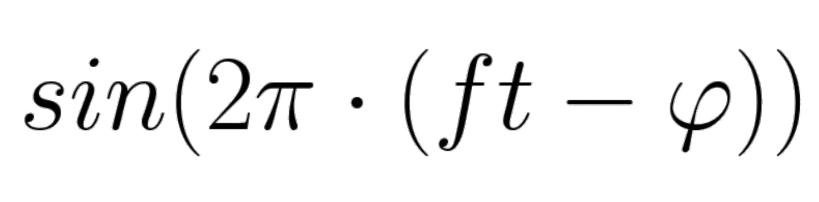

- Amaç : Bu sinyali farklı frekanslara sahip sinüzoidlerle karşılaştırmak ve oradaki benzerliği görmek...

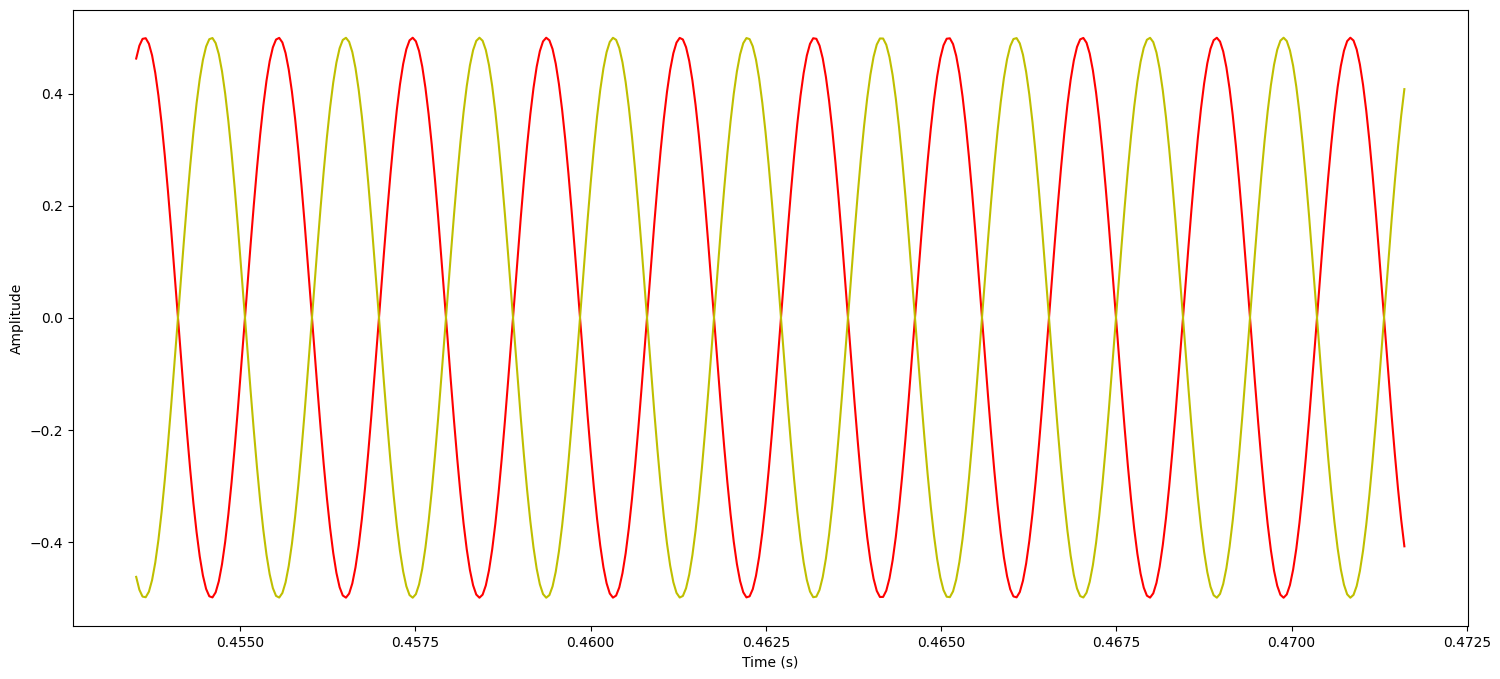

In [31]:
# create a sinusoid
# fonksiyon periyodik devam ettiği için phase2 değeri üzerinde oynama yaparsak dalgaların çakıştığı durumları görebiliriz.
f = 523
phase = 0
phase2 = 0.5
sin = 0.5 * np.sin(2 * np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2 * np.pi * (f * t - phase2))

plt.figure(figsize = (18, 8))
plt.plot(t[10000: 10400], sin[10000: 10400], color = "r")
plt.plot(t[10000: 10400], sin2[10000: 10400], color = "y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

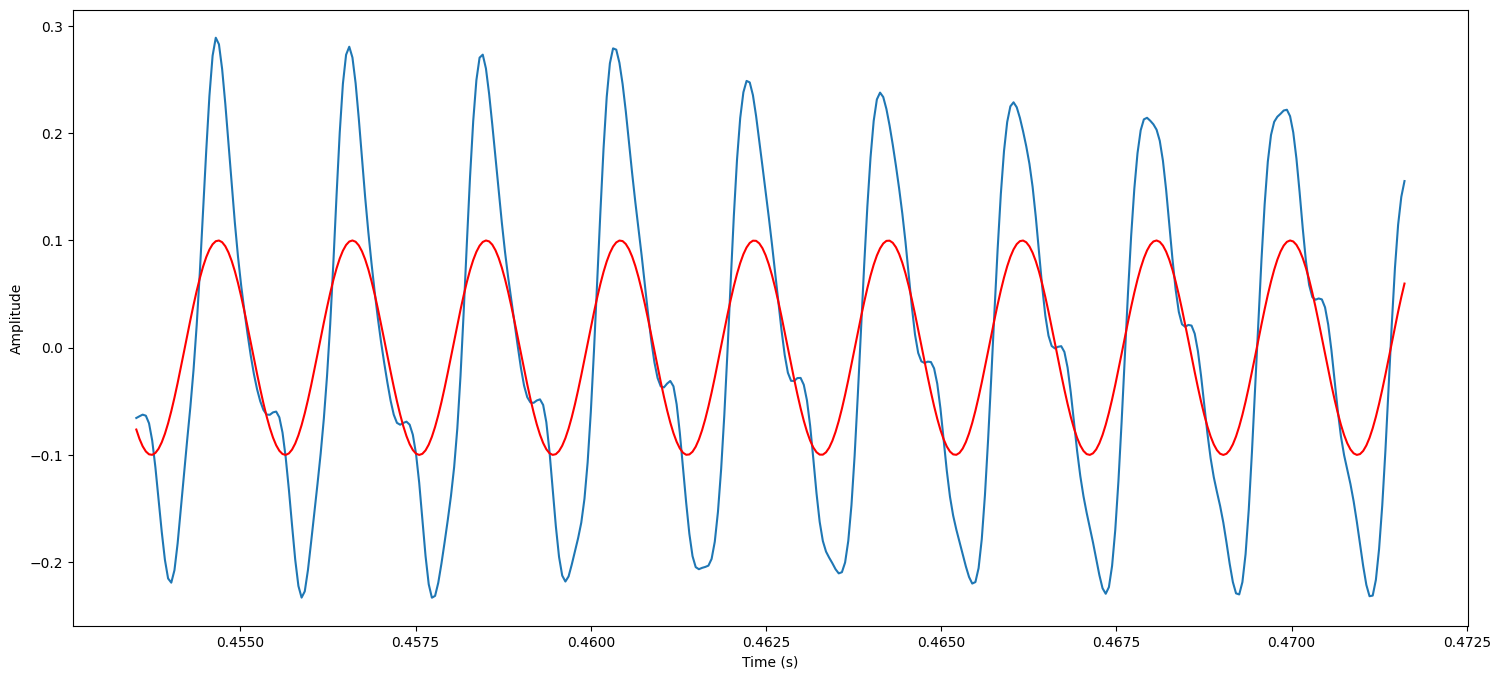

In [32]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

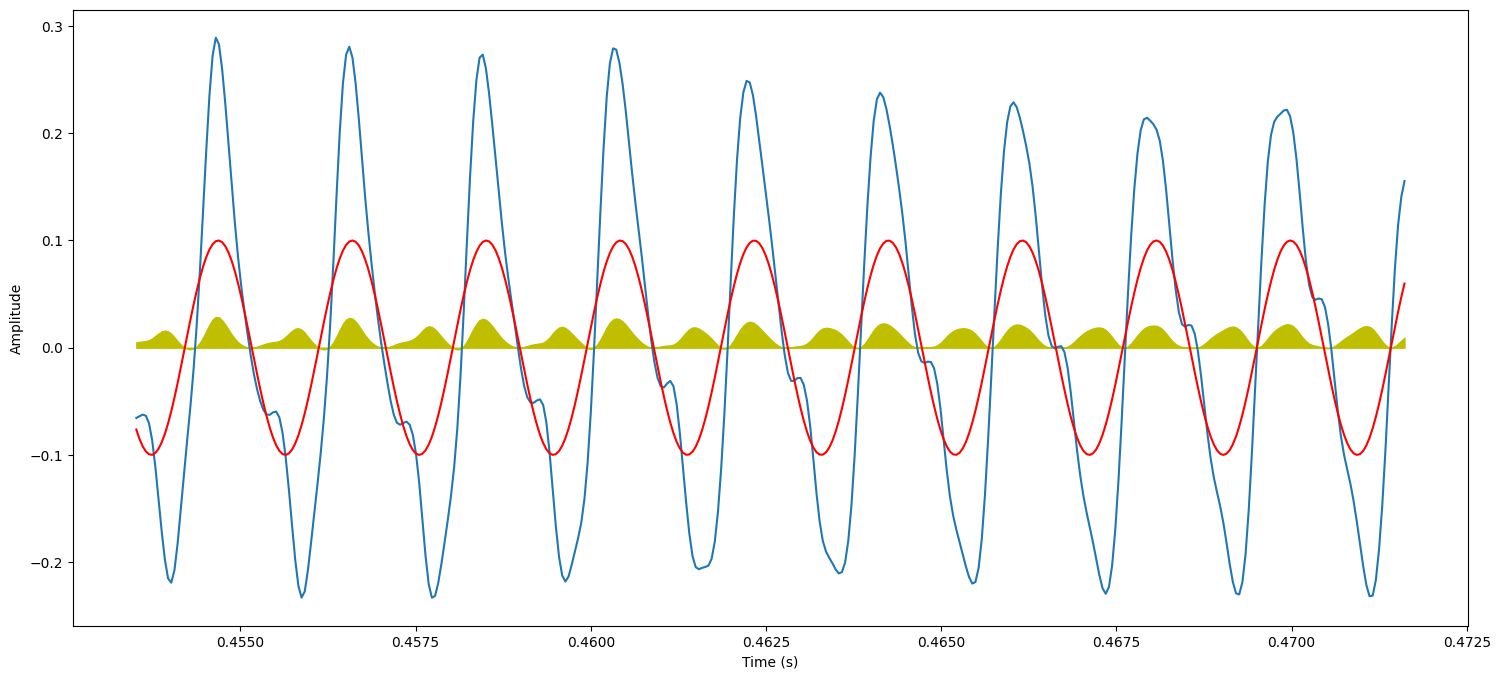

In [33]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

# iki fonksiyon arasındaki benzerlikleri bulmak için yaptığımız sezgisel ve basit bir yolu
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# iki değerimiz de aynı işaretli olduğunda karşılaştırma sonucu da pozitif çıkar ancak zıt işaretli olursalar negatif çıkacaklardır.

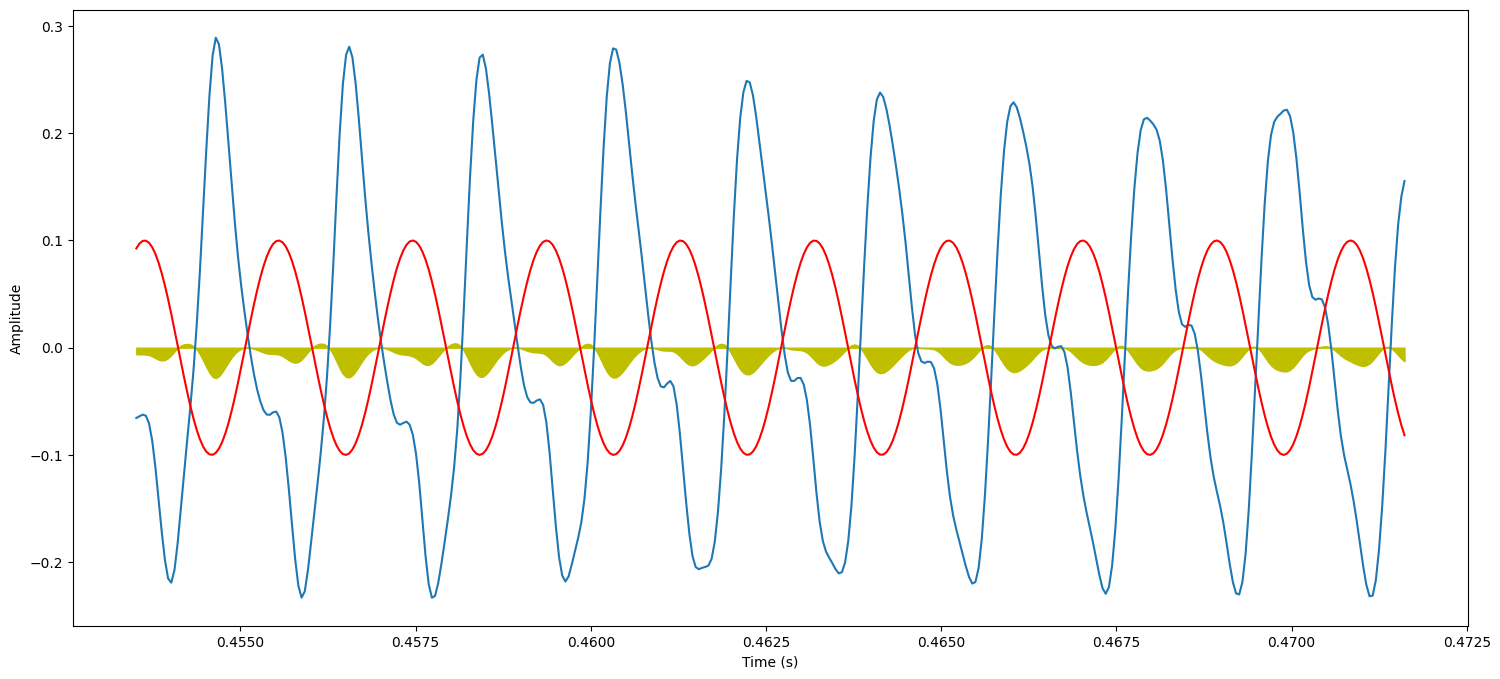

In [34]:
f = 523
phase = 0

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

# iki fonksiyon arasındaki benzerlikleri bulmak için yaptığımız sezgisel ve basit bir yolu
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

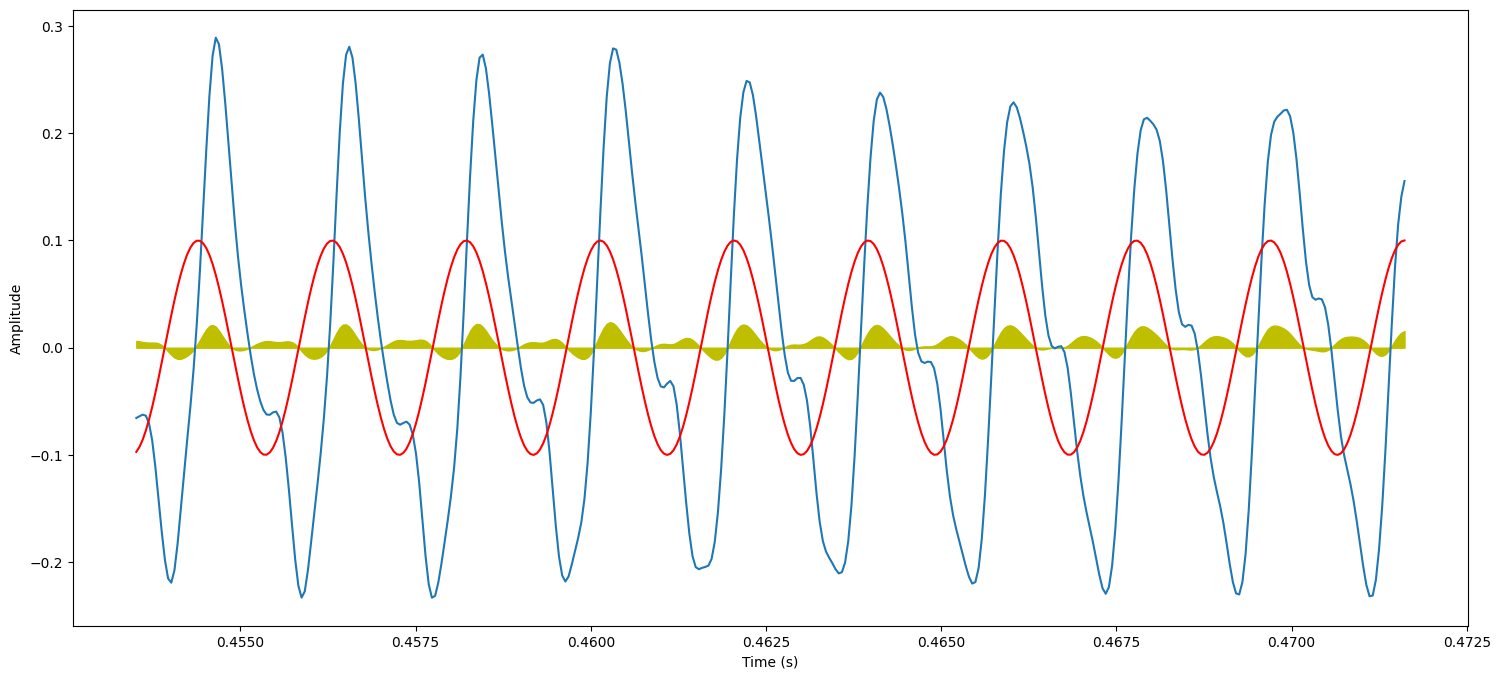

In [35]:
f = 523
phase = 0.4

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

# iki fonksiyon arasındaki benzerlikleri bulmak için yaptığımız sezgisel ve basit bir yolu
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

## Fourier Transform : Step by Step
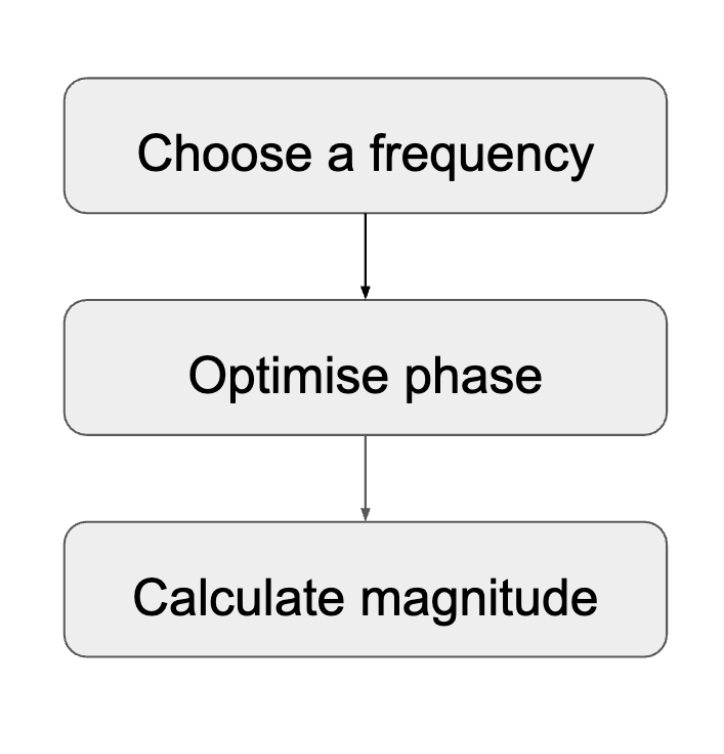

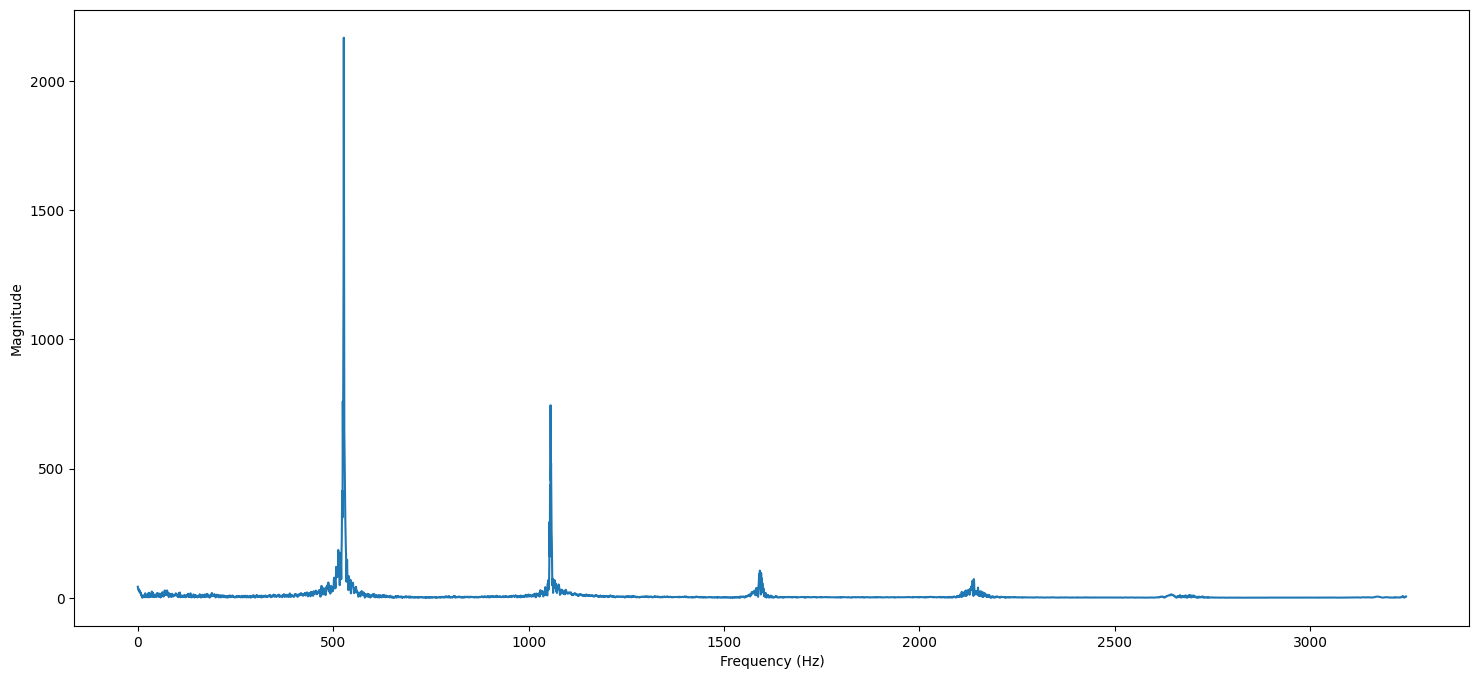

In [36]:
# plot spectrum

plt.figure(figsize = (18, 8))
plt.plot(frequency[ : 5000], magnitude[ : 5000])  # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

## Fourier Transform

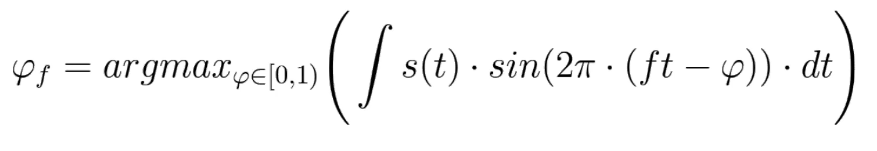

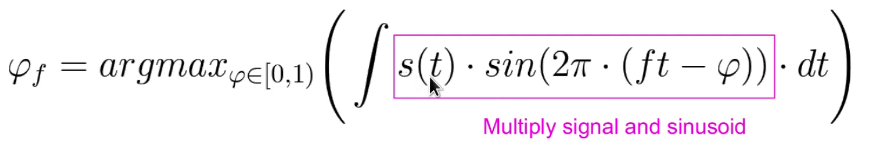

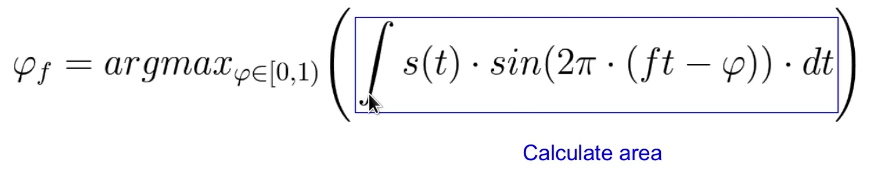

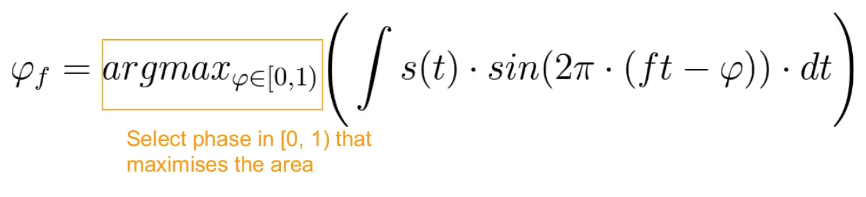

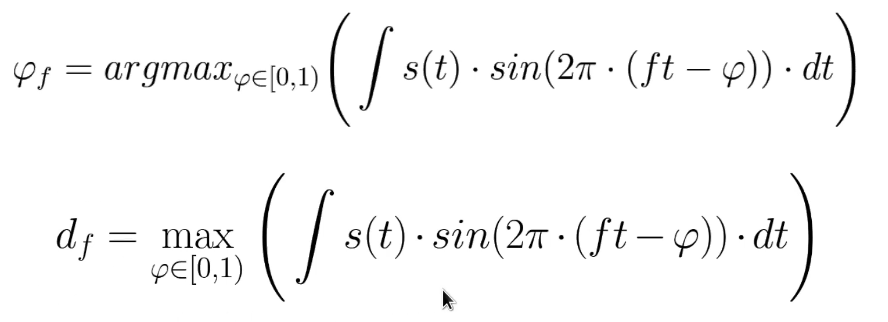

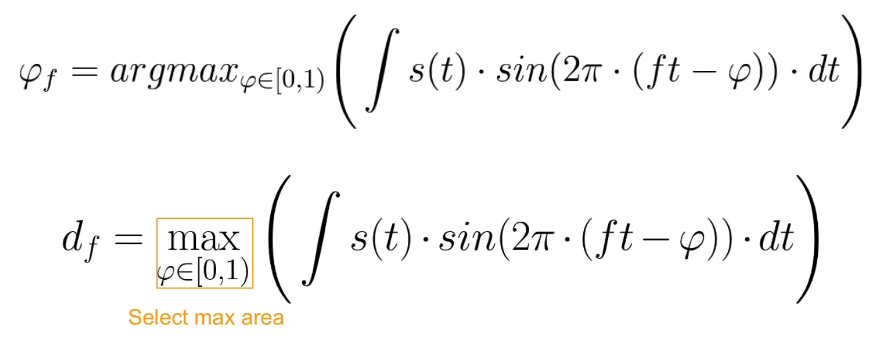

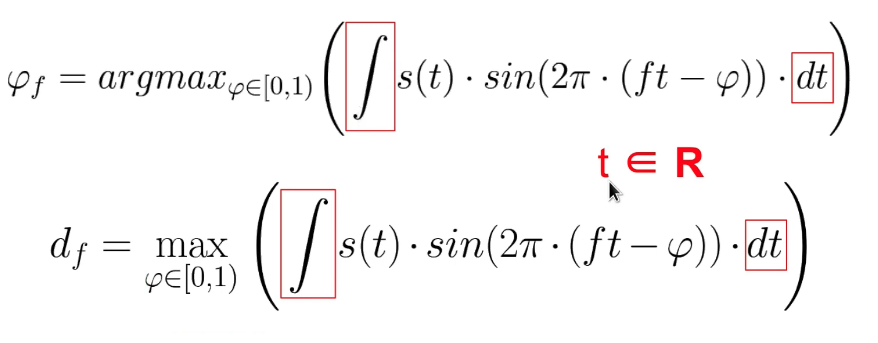

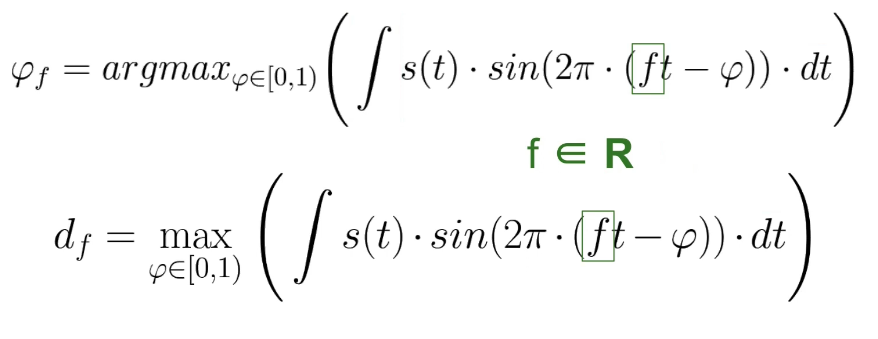

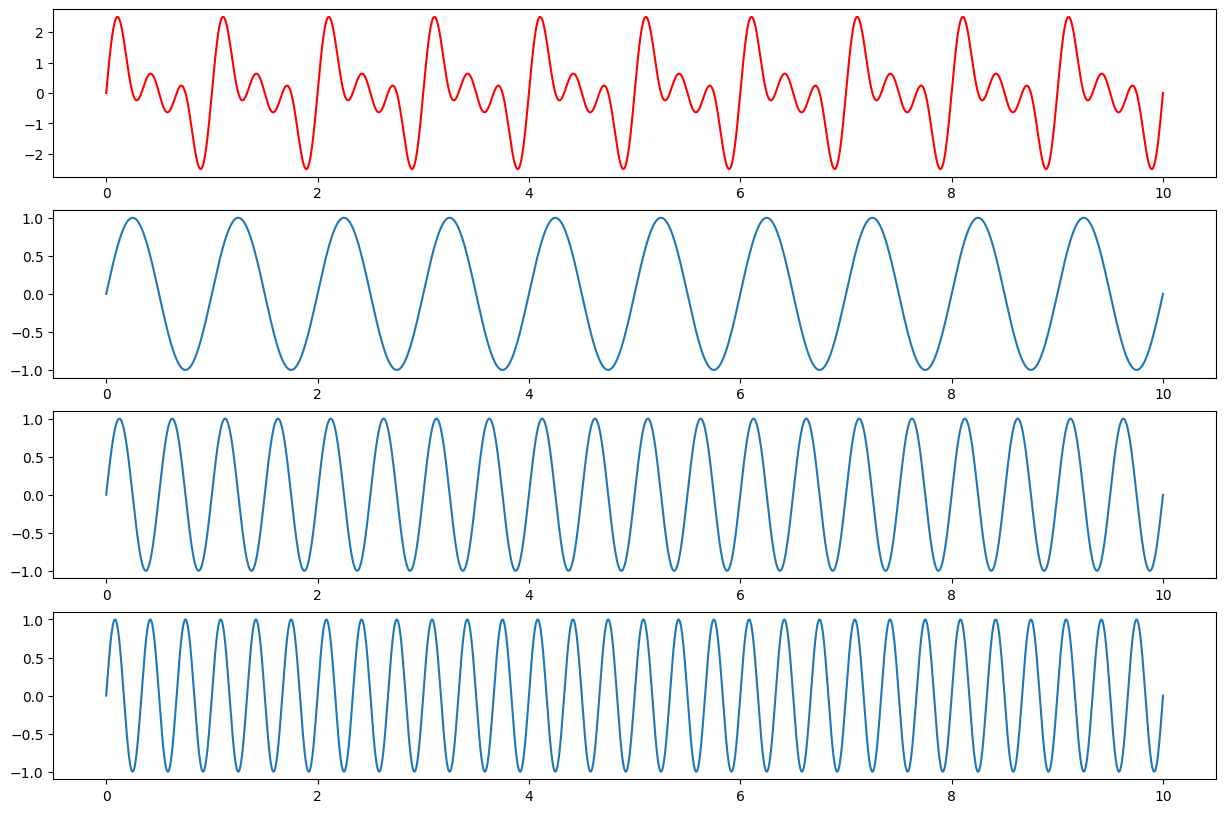

In [37]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()

[teropa harmonics website](https://teropa.info/harmonics-explorer/)